In [2]:
import h5py

from data_utils import get_dataset_path
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import json

In [3]:
f = h5py.File(os.path.join(get_dataset_path(), "cell_data.h5"), 'r')

In [4]:
# Number of images per Brain
for key in f.keys():
    print(f"{len(f[key])} images for brain {key}")

276 images for brain B01
377 images for brain B02
242 images for brain B05
245 images for brain B07
208 images for brain B20


B01
B02
B05
B07
B20


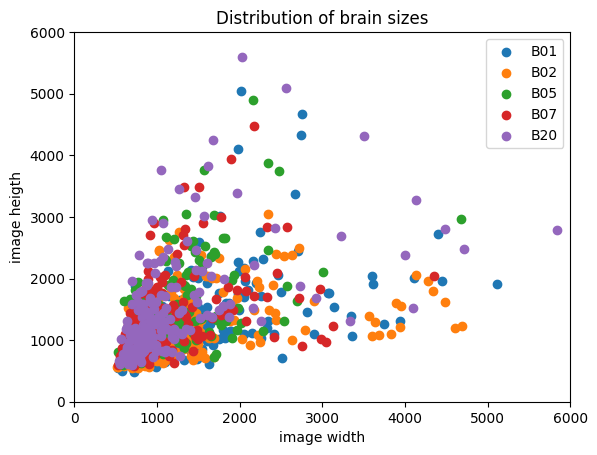

In [5]:
# Distribution of image sizes
image_sizes = {}
for group in f.keys():
    image_sizes[group] = []
    for file in f[group]:
        image_sizes[group].append(f[group][file].shape)
    image_sizes[group] = np.array(image_sizes[group])
plt.figure()
plt.xlim(0, 6000)
plt.ylim(0, 6000)
plt.xlabel("image width")
plt.ylabel("image heigth")
plt.title("Distribution of brain sizes")
colormap = cm.get_cmap("viridis")
for group in image_sizes.keys():
    print(group)
    plt.scatter(image_sizes[group][:, 0], image_sizes[group][:, 1],  label=group)
plt.legend()
plt.show()  

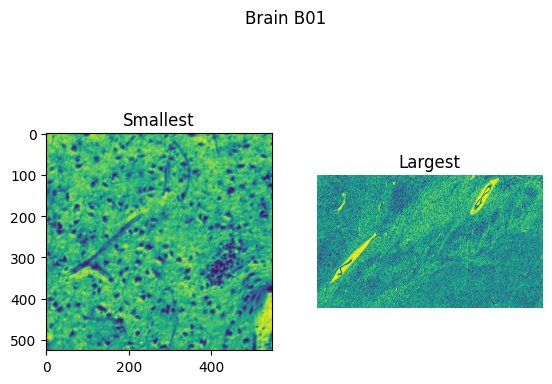

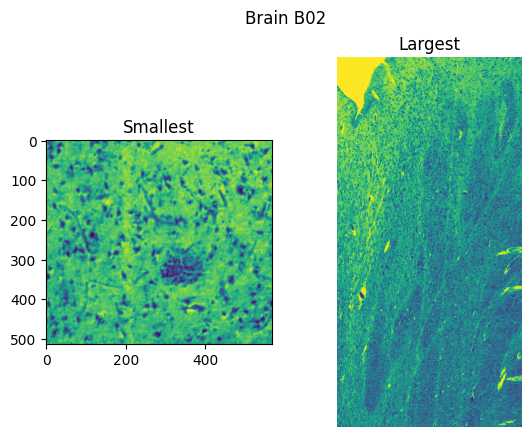

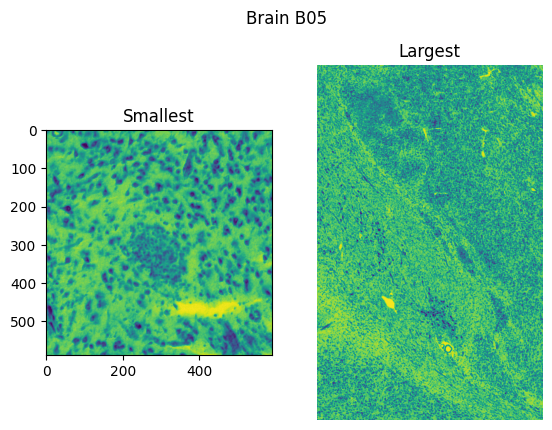

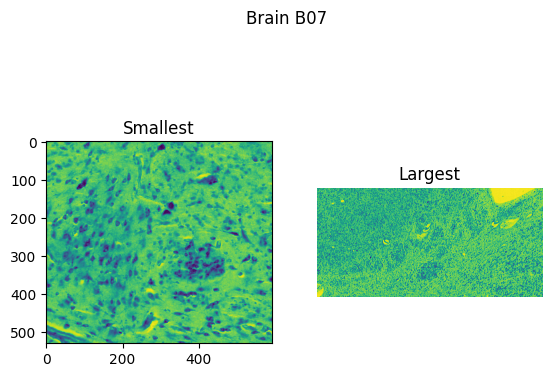

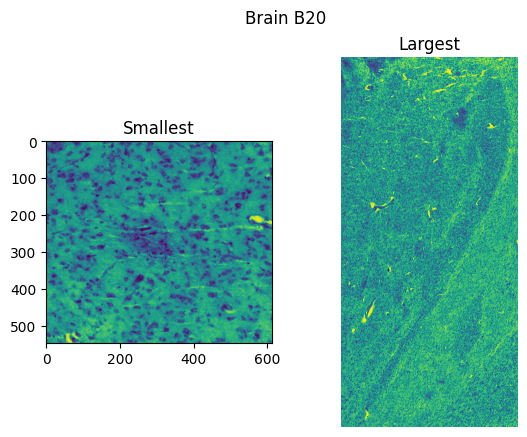

In [6]:
# Largest and smallest image per brain
def find_largest(brain):
    largest_size = -1
    largest_index = -1
    brain_images = f[brain]
    for img in brain_images:
        cur_size = np.prod(brain_images[img].shape)
        if largest_size < cur_size:
            largest_size = cur_size 
            largest_index = img
    return largest_index


def find_smallest(brain):
    smallest_size = float('inf')
    smallest_index = -1
    brain_images = f[brain]
    for img in brain_images.keys():
        cur_size = np.prod(brain_images[img].shape)
        if smallest_size > cur_size:
            smallest_size = cur_size
            smallest_index = img
    return smallest_index

for group in f.keys():
    largest = find_largest(group)
    smallest = find_smallest(group)
    fig, axs  = plt.subplots(1, 2)
    fig.suptitle(f"Brain {group}")
    axs[0].title.set_text("Smallest")
    axs[1].title.set_text("Largest")
    axs[0].imshow(f[group][smallest])
    axs[1].imshow(f[group][largest])
    plt.axis('off')
    plt.show()

In [7]:
training_keys = {"B01", "B02", "B05", "B07"}
test_keys = {"B20"}

def compute_stats(training_keys):
    max_val = float("-inf")
    min_val = float("inf")
    mean = 0
    std = 0
    pixel_count = 0
    # Compute max, min and mean
    for key in training_keys:
        for img in f[key]:
            pixels = np.array(f[key][img])
            max_val = max(max_val, pixels.max())
            min_val = min(max_val, pixels.min())
            mean += pixels.sum()
            pixel_count += np.prod(pixels.shape)
    mean = mean / pixel_count
    # Compute std 
    for key in training_keys:
        for img in f[key]:
            pixels = np.array(f[key][img])
            std += np.sum((pixels - mean) ** 2)
    std = np.sqrt(std / pixel_count)
    return {"min": int(min_val), "max": int(max_val), "mean": mean, "std": std}

stats = compute_stats(training_keys)
display(stats)
with open(os.path.join(get_dataset_path(), "stats.json"), "w") as outfile:
    json.dump(stats, outfile)

{'min': 16, 'max': 255, 'mean': 152.55165779329369, 'std': 48.740665616152924}